In [11]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [13]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [14]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-36.41126658564137 133.27267263558127
42.82241235229884 -67.44747254124579
-56.51389572570282 62.14506869601442
-9.727121625943838 37.99611394432745
28.883332885026647 -106.02677197783792
-78.93468351537035 -179.61500398496403
81.60710700031404 105.08183614506692
-54.59486014812127 48.95889905148397
-77.99620535403753 126.98098689614807
44.162536245419886 -142.49622596205967
86.76221611320051 99.28756408459657
46.482154797921794 52.79991640030758
87.00477286827041 -124.76957647140574
-46.6143746876103 -128.53110461239248
-58.23019572932323 101.54038339903116
67.62514406196712 156.5958437383095
-43.186887681018796 97.29473392835172
68.46581347560513 -51.624817188691196
-0.4108773464542139 -4.696134644525387
-40.99502947915226 -98.01900004424762
-20.312518183162908 12.461205460863056
75.7736330513253 -157.8457263220688
-37.304030006715216 -64.83221425182711
-35.982627461554806 -97.62789254809964
9.626298462633642 -18.538779087750413
0.3208430171437442 -101.47056954297742
-47.145451072412

8.876802567723587 175.60966779943402
-5.969205355952539 -81.05683316467517
-1.819335542459683 -99.65704638464643
-9.332972709596731 -169.67806142529565
-7.744004626393917 -51.3587410562678
-64.31712867624175 0.9781013940979619
60.38968277688895 -60.877892202794186
-42.3923008406578 161.36414884394372
-78.10270908380087 138.43143045184877
39.474036268237626 -0.30829094203934915
-23.219297554033247 -18.87254008947835
33.043809204074236 -128.5316577862459
-45.53500401329888 -179.3294587725931
17.694995956403332 -46.8051713738175
-31.547772594029368 112.6231377450934
-18.123016154057353 128.97025454120347
14.888139574420634 -23.144947499253078
-10.458275930718116 -131.73712518182427
15.177169624103527 86.47714169539904
61.53211326410354 150.57444126620942
66.4263930481236 -71.15775098360776
15.164228227659791 -66.02720659469038
-52.277771207234984 -133.30040395396705
86.83071794352472 5.777100080059711
-80.92975343503123 71.71788252323859
-2.1592238535825317 -80.91316394468402
79.339915876

In [15]:
from citipy import citipy

In [16]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [17]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [18]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e81447b66f6e42cb72f4037ad708b23f


In [19]:
# Import the time library and the datetime module from the datetime library.
import time
from datetime import datetime

In [20]:
# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S') 

        # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port lincoln
Processing Record 2 of Set 1 | yarmouth
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | liwale
Processing Record 5 of Set 1 | chihuahua
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | khatanga
Processing Record 8 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | sitka
Processing Record 11 of Set 1 | karaton
Processing Record 12 of Set 1 | tuktoyaktuk
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | srednekolymsk
Processing Record 16 of Set 1 | qasigiannguit
Processing Record 17 of Set 1 | san-pedro
Processing Record 18 of Set 1 | ancud
Processing Record 19 of Set 1 | khorixas
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 | santa rosa
Processing Record 22 

Processing Record 39 of Set 4 | the valley
Processing Record 40 of Set 4 | rovaniemi
Processing Record 41 of Set 4 | ust-koksa
Processing Record 42 of Set 4 | port hardy
Processing Record 43 of Set 4 | hami
Processing Record 44 of Set 4 | chioggia
Processing Record 45 of Set 4 | kindersley
Processing Record 46 of Set 4 | lai
Processing Record 47 of Set 4 | tazmalt
Processing Record 48 of Set 4 | phalaborwa
Processing Record 49 of Set 4 | sorvag
City not found. Skipping...
Processing Record 50 of Set 4 | chokurdakh
Processing Record 1 of Set 5 | sendafa
Processing Record 2 of Set 5 | bengkulu
Processing Record 3 of Set 5 | orlik
Processing Record 4 of Set 5 | kalmunai
Processing Record 5 of Set 5 | dutlwe
Processing Record 6 of Set 5 | oskemen
Processing Record 7 of Set 5 | kaitangata
Processing Record 8 of Set 5 | bintulu
Processing Record 9 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 10 of Set 5 | asau
Processing Record 11 of Set 5 | umm ruwabah
City not fou

Processing Record 24 of Set 8 | mitsamiouli
Processing Record 25 of Set 8 | prince rupert
Processing Record 26 of Set 8 | sembakung
Processing Record 27 of Set 8 | matara
Processing Record 28 of Set 8 | codrington
Processing Record 29 of Set 8 | siocon
Processing Record 30 of Set 8 | mumbwa
Processing Record 31 of Set 8 | mount isa
Processing Record 32 of Set 8 | pingliang
Processing Record 33 of Set 8 | lamu
Processing Record 34 of Set 8 | talcahuano
Processing Record 35 of Set 8 | palma di montechiaro
Processing Record 36 of Set 8 | la ronge
Processing Record 37 of Set 8 | igrim
Processing Record 38 of Set 8 | tessalit
Processing Record 39 of Set 8 | nome
Processing Record 40 of Set 8 | klaksvik
Processing Record 41 of Set 8 | kathu
Processing Record 42 of Set 8 | vao
Processing Record 43 of Set 8 | martinsburg
Processing Record 44 of Set 8 | yinchuan
Processing Record 45 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 46 of Set 8 | baroy
Processing Record 47 of S

Processing Record 9 of Set 12 | dmytrivka
Processing Record 10 of Set 12 | arbuzynka
Processing Record 11 of Set 12 | palatka
Processing Record 12 of Set 12 | geraldton
Processing Record 13 of Set 12 | boddam
Processing Record 14 of Set 12 | ulladulla
Processing Record 15 of Set 12 | kindu
Processing Record 16 of Set 12 | guane
Processing Record 17 of Set 12 | guerrero negro
Processing Record 18 of Set 12 | clyde river
Processing Record 19 of Set 12 | imeni poliny osipenko
Processing Record 20 of Set 12 | powassan
Processing Record 21 of Set 12 | hihifo
City not found. Skipping...
Processing Record 22 of Set 12 | saint-pierre
Processing Record 23 of Set 12 | kavieng
Processing Record 24 of Set 12 | shelton
Processing Record 25 of Set 12 | mason city
Processing Record 26 of Set 12 | lokosovo
Processing Record 27 of Set 12 | nizhniy odes
Processing Record 28 of Set 12 | doha
Processing Record 29 of Set 12 | naica
Processing Record 30 of Set 12 | pathein
Processing Record 31 of Set 12 | m

In [21]:
# Convert array of dictionaries to a pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Lincoln,-34.7333,135.8667,56.30,71,3,9.71,AU,2022-07-28 01:12:05
1,Yarmouth,41.7057,-70.2286,75.00,72,0,12.66,US,2022-07-28 01:17:28
2,Liwale,-9.7667,37.9333,61.11,75,21,3.36,TZ,2022-07-28 01:17:29
3,Chihuahua,28.5000,-106.0000,76.03,35,46,17.34,MX,2022-07-28 01:17:29
4,Vaini,-21.2000,-175.2000,80.76,83,20,9.22,TO,2022-07-28 01:07:46
5,Khatanga,71.9667,102.5000,68.72,50,76,1.68,RU,2022-07-28 01:12:02
6,New Norfolk,-42.7826,147.0587,52.72,74,92,1.99,AU,2022-07-28 01:11:57
7,Sitka,57.0531,-135.3300,60.69,77,100,3.44,US,2022-07-28 01:12:40
8,Karaton,-6.3424,106.1045,76.39,83,96,3.87,ID,2022-07-28 01:17:30
9,Tuktoyaktuk,69.4541,-133.0374,48.20,87,75,13.80,CA,2022-07-28 01:17:30


In [22]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [23]:
city_data = city_data_df[new_column_order]


In [72]:
# Create the output file (CSV).
output_data_file = "World_Weather_Analysis/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [52]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [54]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv("World_Weather_Analysis/cities.csv")
city_data_df.head(10)

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Port Lincoln,-34.7333,135.8667,56.30,71,3,9.71,AU,2022-07-28 01:12:05
1,1,Yarmouth,41.7057,-70.2286,75.00,72,0,12.66,US,2022-07-28 01:17:28
2,2,Liwale,-9.7667,37.9333,61.11,75,21,3.36,TZ,2022-07-28 01:17:29
3,3,Chihuahua,28.5000,-106.0000,76.03,35,46,17.34,MX,2022-07-28 01:17:29
4,4,Vaini,-21.2000,-175.2000,80.76,83,20,9.22,TO,2022-07-28 01:07:46
5,5,Khatanga,71.9667,102.5000,68.72,50,76,1.68,RU,2022-07-28 01:12:02
6,6,New Norfolk,-42.7826,147.0587,52.72,74,92,1.99,AU,2022-07-28 01:11:57
7,7,Sitka,57.0531,-135.3300,60.69,77,100,3.44,US,2022-07-28 01:12:40
8,8,Karaton,-6.3424,106.1045,76.39,83,96,3.87,ID,2022-07-28 01:17:30
9,9,Tuktoyaktuk,69.4541,-133.0374,48.20,87,75,13.80,CA,2022-07-28 01:17:30


In [55]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

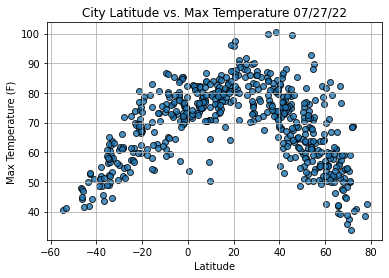

In [56]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("World_Weather_Analysis/Fig1.png")

# Show plot.
plt.show()

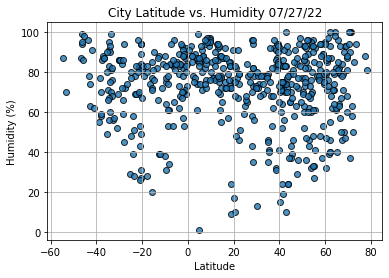

In [57]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("World_Weather_Analysis/Fig1.png")

# Show plot.
plt.show()

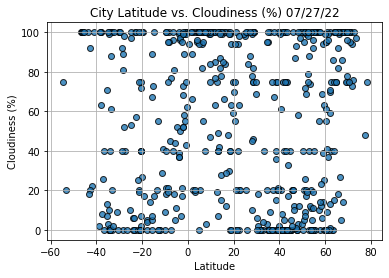

In [58]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("World_Weather_Analysis/Fig1.png")

# Show plot.
plt.show()

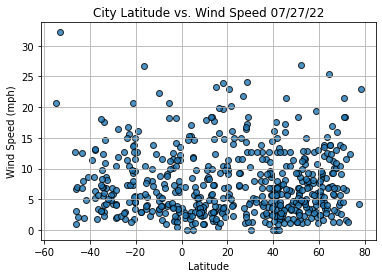

In [59]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("World_Weather_Analysis/Fig1.png")

# Show plot.
plt.show()

In [60]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regresson on hemisphere weather data.
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
#     print(f"The r-squared is: {rvalue:.3f}")
    plt.show()

In [61]:
index13 = city_data_df.loc[13]
index13

City_ID                        13
City                Qasigiannguit
Lat                       68.8193
Lng                      -51.1922
Max Temp                    44.85
Humidity                       93
Cloudiness                    100
Wind Speed                   1.21
Country                        GL
Date          2022-07-28 01:17:31
Name: 13, dtype: object

In [63]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,1,Yarmouth,41.7057,-70.2286,75.00,72,0,12.66,US,2022-07-28 01:17:28
3,3,Chihuahua,28.5000,-106.0000,76.03,35,46,17.34,MX,2022-07-28 01:17:29
5,5,Khatanga,71.9667,102.5000,68.72,50,76,1.68,RU,2022-07-28 01:12:02
7,7,Sitka,57.0531,-135.3300,60.69,77,100,3.44,US,2022-07-28 01:12:40
9,9,Tuktoyaktuk,69.4541,-133.0374,48.20,87,75,13.80,CA,2022-07-28 01:17:30


In [64]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

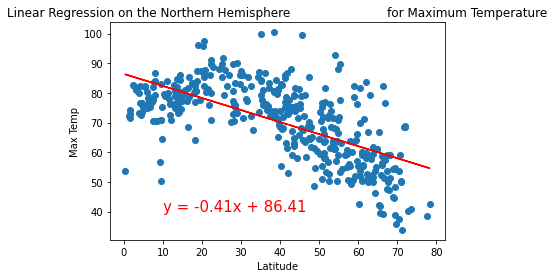

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

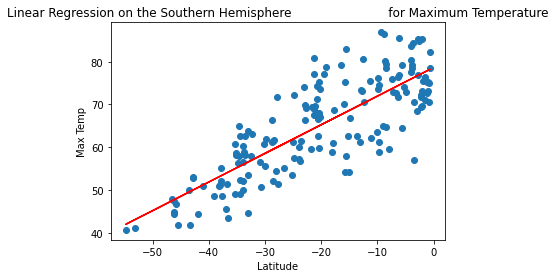

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

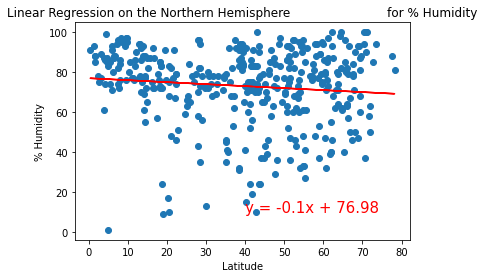

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

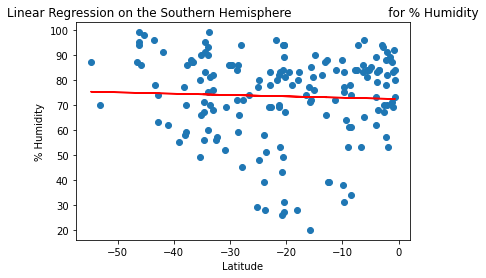

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

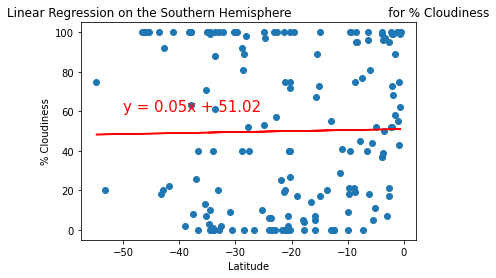

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

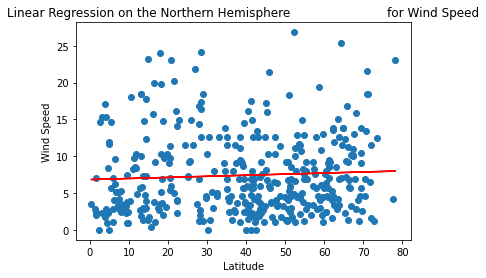

In [70]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

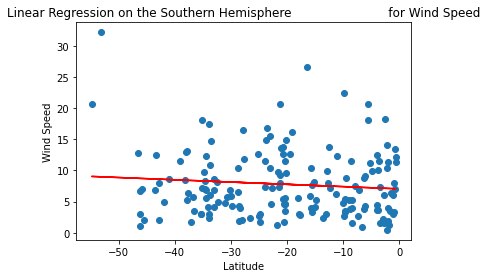

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))